In [1]:
# 02

import numpy as np
import pandas as pd

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class priors
class_priors = np.bincount(y_train) / len(y_train)

# Calculate class means and variances
class_means = []
class_variances = []
for i in range(3):
    class_i_data = X_train[y_train == i]
    class_means.append(np.mean(class_i_data, axis=0))
    class_variances.append(np.var(class_i_data, axis=0))

# Define the Gaussian Naive Bayes classifier
def predict(X):
    predictions = []
    for x in X:
        class_scores = []
        for i in range(3):
            log_prior = np.log(class_priors[i])
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
            log_likelihood -= 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i])
            class_scores.append(log_prior + log_likelihood)
        predictions.append(np.argmax(class_scores))
    return predictions

# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = np.zeros((3, 3))
for true, pred in zip(y_test, y_pred):
    conf_matrix[true, pred] += 1
print("Confusion Matrix:")
print(conf_matrix)

# Covariance matrices (complete, diagonal, equal)
cov_complete = np.cov(X_train.T)
cov_diagonal = np.diag(np.diag(cov_complete))
cov_equal = np.mean(cov_complete) * np.eye(X_train.shape[1])

print("Covariance Matrix (Complete):")
print(cov_complete)
print("Covariance Matrix (Diagonal):")
print(cov_diagonal)
print("Covariance Matrix (Equal):")
print(cov_equal)


Accuracy: 0.98
Confusion Matrix:
[[19.  0.  0.]
 [ 0. 12.  1.]
 [ 0.  0. 13.]]
Covariance Matrix (Complete):
[[ 0.6943956  -0.01146978  1.24339286  0.49417582]
 [-0.01146978  0.17548535 -0.24423535 -0.08345238]
 [ 1.24339286 -0.24423535  2.96306227  1.22462546]
 [ 0.49417582 -0.08345238  1.22462546  0.5516337 ]]
Covariance Matrix (Diagonal):
[[0.6943956  0.         0.         0.        ]
 [0.         0.17548535 0.         0.        ]
 [0.         0.         2.96306227 0.        ]
 [0.         0.         0.         0.5516337 ]]
Covariance Matrix (Equal):
[[0.60191564 0.         0.         0.        ]
 [0.         0.60191564 0.         0.        ]
 [0.         0.         0.60191564 0.        ]
 [0.         0.         0.         0.60191564]]


In [2]:
#01

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Carregando o conjunto de dados Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o classificador bayesiano gaussiano
gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = gnb.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Calculando as matrizes de covariância
cov_complete = np.cov(X_train.T)
cov_diagonal = np.diag(np.diag(cov_complete))
cov_equal = np.mean(cov_complete) * np.eye(X_train.shape[1])

print("Matriz de Covariância Completa:")
print(cov_complete)
print("Matriz de Covariância Diagonal:")
print(cov_diagonal)
print("Matriz de Covariância Igual:")
print(cov_equal)


Acurácia: 0.98
Matriz de Confusão:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Matriz de Covariância Completa:
[[ 0.6943956  -0.01146978  1.24339286  0.49417582]
 [-0.01146978  0.17548535 -0.24423535 -0.08345238]
 [ 1.24339286 -0.24423535  2.96306227  1.22462546]
 [ 0.49417582 -0.08345238  1.22462546  0.5516337 ]]
Matriz de Covariância Diagonal:
[[0.6943956  0.         0.         0.        ]
 [0.         0.17548535 0.         0.        ]
 [0.         0.         2.96306227 0.        ]
 [0.         0.         0.         0.5516337 ]]
Matriz de Covariância Igual:
[[0.60191564 0.         0.         0.        ]
 [0.         0.60191564 0.         0.        ]
 [0.         0.         0.60191564 0.        ]
 [0.         0.         0.         0.60191564]]


In [3]:
#03
import numpy as np
import pandas as pd

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class priors
class_priors = np.bincount(y_train) / len(y_train)

# Calculate class means and variances
class_means = []
class_variances = []
for i in range(3):
    class_i_data = X_train[y_train == i]
    class_means.append(np.mean(class_i_data, axis=0))
    class_variances.append(np.var(class_i_data, axis=0))

# Define the Gaussian Naive Bayes classifier
def predict(X):
    predictions = []
    for x in X:
        class_scores = []
        for i in range(3):
            log_prior = np.log(class_priors[i])
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
            log_likelihood -= 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i])
            class_scores.append(log_prior + log_likelihood)
        predictions.append(np.argmax(class_scores))
    return predictions

# Make predictions on the test set
y_pred = predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = np.zeros((3, 3))
for true, pred in zip(y_test, y_pred):
    conf_matrix[true, pred] += 1
print("Confusion Matrix:")
print(conf_matrix)

# Covariance matrices (complete, diagonal, equal)
cov_complete = np.cov(X_train.T)
cov_diagonal = np.diag(np.diag(cov_complete))
cov_equal = np.mean(cov_complete) * np.eye(X_train.shape[1])

print("Covariance Matrix (Complete):")
print(cov_complete)
print("Covariance Matrix (Diagonal):")
print(cov_diagonal)
print("Covariance Matrix (Equal):")
print(cov_equal)



Accuracy: 0.98
Confusion Matrix:
[[19.  0.  0.]
 [ 0. 12.  1.]
 [ 0.  0. 13.]]
Covariance Matrix (Complete):
[[ 0.6943956  -0.01146978  1.24339286  0.49417582]
 [-0.01146978  0.17548535 -0.24423535 -0.08345238]
 [ 1.24339286 -0.24423535  2.96306227  1.22462546]
 [ 0.49417582 -0.08345238  1.22462546  0.5516337 ]]
Covariance Matrix (Diagonal):
[[0.6943956  0.         0.         0.        ]
 [0.         0.17548535 0.         0.        ]
 [0.         0.         2.96306227 0.        ]
 [0.         0.         0.         0.5516337 ]]
Covariance Matrix (Equal):
[[0.60191564 0.         0.         0.        ]
 [0.         0.60191564 0.         0.        ]
 [0.         0.         0.60191564 0.        ]
 [0.         0.         0.         0.60191564]]


In [9]:
# 06
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Função de previsão
    def predict(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred = predict(X_test)

    # Calcular métricas
    accuracy, std_dev, conf_matrix = calculate_metrics(y_test, y_pred)
    accuracies.append((accuracy, std_dev, conf_matrix, X_train))

# Calcular média e desvio padrão das acurácias
mean_accuracies = np.mean([acc[0] for acc in accuracies])
std_accuracies = np.std([acc[0] for acc in accuracies])

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index = np.argmin(np.abs([acc[0] - mean_accuracies for acc in accuracies]))
best_accuracy, best_std_dev, best_conf_matrix, best_X_train = accuracies[best_realization_index]

# Imprimir os resultados da melhor realização

print(f"Dataset : IRIS\n")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy:.4f}")
print(f"Desvio Padrão: {best_std_dev:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix)
print("Covariance Matrix (Complete):")
print(np.cov(best_X_train.T))
print("Covariance Matrix (Diagonal):")
print(np.diag(np.diag(np.cov(best_X_train.T))))
print("Covariance Matrix (Equal):")
print(np.mean(np.cov(best_X_train.T)) * np.eye(best_X_train.shape[1]))


Dataset : IRIS

Melhor Realização: 4
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[14.  0.  0.]
 [ 0. 16.  1.]
 [ 0.  1. 13.]]
Covariance Matrix (Complete):
[[ 0.70960073 -0.04926007  1.31511447  0.52299176]
 [-0.04926007  0.19609524 -0.35236722 -0.1331511 ]
 [ 1.31511447 -0.35236722  3.2085348   1.32729396]
 [ 0.52299176 -0.1331511   1.32729396  0.59451099]]
Covariance Matrix (Diagonal):
[[0.70960073 0.         0.         0.        ]
 [0.         0.19609524 0.         0.        ]
 [0.         0.         3.2085348  0.        ]
 [0.         0.         0.         0.59451099]]
Covariance Matrix (Equal):
[[0.62312408 0.         0.         0.        ]
 [0.         0.62312408 0.         0.        ]
 [0.         0.         0.62312408 0.        ]
 [0.         0.         0.         0.62312408]]


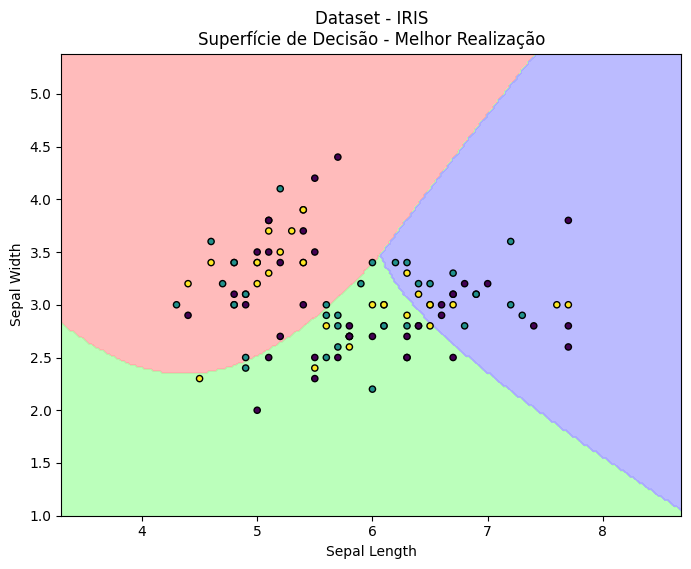

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, variances, priors, ax):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Função de previsão
def predict(X, means, variances, priors):
    predictions = []
    for x in X:
        class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                        - 0.5 * np.sum(((x - means[i][:2]) ** 2) / variances[i][:2]) for i in range(3)]
        predictions.append(np.argmax(class_scores))
    return predictions

# Dados para plotagem
X_plot = best_X_train[:, :2]  # Usando apenas as duas primeiras características
y_plot = y_train

# Plotagem
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_surface(X_plot, y_plot, class_means, class_variances, class_priors, ax)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Dataset - IRIS\nSuperfície de Decisão - Melhor Realização')
plt.show()


C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_17340\1823353989.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)


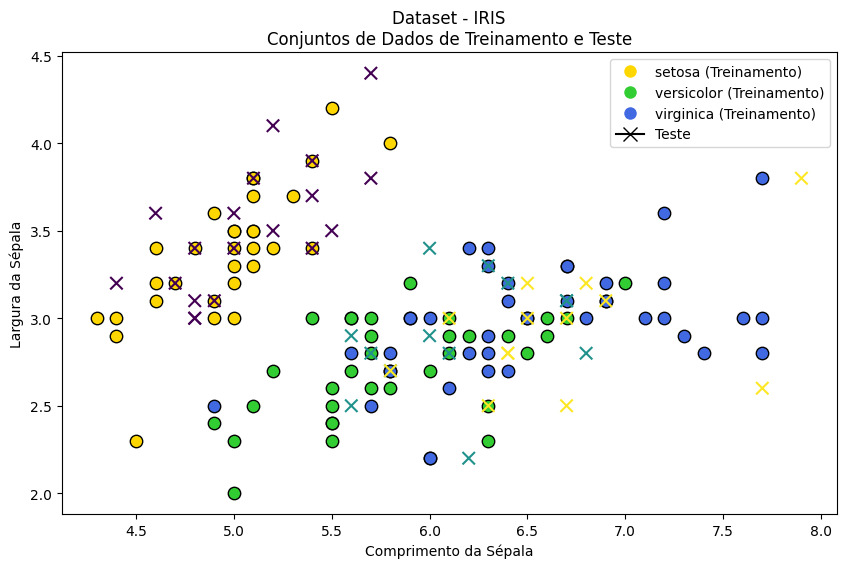

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom colors for training and test points
train_colors = ['gold', 'limegreen', 'royalblue']
test_color = 'black'

def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{iris.target_names[i]} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Comprimento da Sépala')
    plt.ylabel('Largura da Sépala')
    plt.title('Dataset - IRIS\nConjuntos de Dados de Treinamento e Teste')

    # Adicionando uma legenda personalizada com nomes de espécies
    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'{iris.target_names[i]} (Treinamento)', markerfacecolor=train_colors[i], markersize=10) for i in range(3)]
    custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
    plt.legend(handles=custom_lines, loc='upper right')

    plt.show()

# Usar a função para plotar os conjuntos de dados de treinamento e teste
plot_dataset(X_train, y_train, X_test, y_test)
